In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

### Read in Data

In [2]:
for (dirpath, dirnames, filenames) in os.walk('../Data/recipes/'):
    break

In [3]:
len(filenames)

31

In [6]:
df = pd.DataFrame()
for i in filenames:
    new_df = pd.read_csv('../Data/recipes/' + i)
    df = pd.concat([df, new_df], axis=0, ignore_index=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
# Save complete dataframe as new file
df.to_csv('../Data/complete_brewtoad_recipes.csv')

### Data Cleaning

In [8]:
df.head()

,ABV,FG,IBU,OG,SRM,Unnamed: 0,boil_time,boil_time_units,extras,fermentables,hops,link,meets_guidelines,name,style,volume,volume_units,yeast
0,0.069,1.013,31.0,1.066,4.0,0,60.0,min,"{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...","{0: {'amount': 22.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 3.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/saison-sez-sean,0.0,Saison Sez Sean,Saison,13.00,gal,"{0: {'name': '1.5\n\noz', 'yeast_lab': 'Wyeast..."
1,0.062,1.016,59.0,1.063,28.0,1,60.0,min,0,"{0: {'amount': 12.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/unkindness-of-...,0.0,Unkindness of Ravens,Baltic Porter,5.49,gal,"{0: {'name': 'Dry English Ale Yeast', 'yeast_l..."
2,0.086,1.020,71.0,1.086,13.0,2,60.0,min,0,"{0: {'amount': 12.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/supposed-to-be...,0.0,Supposed to be IPA,American Amber Ale,5.00,gal,"{0: {'name': ""Denny's Favorite 50"", 'yeast_lab..."
3,0.091,1.031,26.0,1.100,39.0,3,60.0,min,"{0: {'amount': 0.21875, 'amount_unit': 'gal', ...","{0: {'amount': 20.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 2.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/9-20-imperial-...,0.0,9/20 Imperial Porter,Robust Porter,10.00,gal,"{0: {'name': 'Northwest Ale', 'yeast_lab': 'Wy..."
4,0.074,1.021,31.0,1.077,18.0,4,60.0,min,0,"{0: {'amount': 11.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/toasty-nut-brown,0.0,Toasty nut brown,Northern English Brown Ale,5.50,gal,"{0: {'name': 'Safale S-04', 'yeast_lab': 'Ferm..."


In [9]:
# Drop redundant index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Check to make sure that it dropped
df.head()

,ABV,FG,IBU,OG,SRM,boil_time,boil_time_units,extras,fermentables,hops,link,meets_guidelines,name,style,volume,volume_units,yeast
0,0.069,1.013,31.0,1.066,4.0,60.0,min,"{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...","{0: {'amount': 22.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 3.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/saison-sez-sean,0.0,Saison Sez Sean,Saison,13.00,gal,"{0: {'name': '1.5\n\noz', 'yeast_lab': 'Wyeast..."
1,0.062,1.016,59.0,1.063,28.0,60.0,min,0,"{0: {'amount': 12.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/unkindness-of-...,0.0,Unkindness of Ravens,Baltic Porter,5.49,gal,"{0: {'name': 'Dry English Ale Yeast', 'yeast_l..."
2,0.086,1.020,71.0,1.086,13.0,60.0,min,0,"{0: {'amount': 12.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/supposed-to-be...,0.0,Supposed to be IPA,American Amber Ale,5.00,gal,"{0: {'name': ""Denny's Favorite 50"", 'yeast_lab..."
3,0.091,1.031,26.0,1.100,39.0,60.0,min,"{0: {'amount': 0.21875, 'amount_unit': 'gal', ...","{0: {'amount': 20.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 2.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/9-20-imperial-...,0.0,9/20 Imperial Porter,Robust Porter,10.00,gal,"{0: {'name': 'Northwest Ale', 'yeast_lab': 'Wy..."
4,0.074,1.021,31.0,1.077,18.0,60.0,min,0,"{0: {'amount': 11.0, 'amount_unit': 'lb', 'nam...","{0: {'amount': 1.0, 'amount_unit': 'oz', 'name...",http://www.brewtoad.com/recipes/toasty-nut-brown,0.0,Toasty nut brown,Northern English Brown Ale,5.50,gal,"{0: {'name': 'Safale S-04', 'yeast_lab': 'Ferm..."


In [11]:
# Find number of recipes collected
df.shape

(88544, 17)

In [14]:
df.isnull().sum()

ABV                 0
FG                  0
IBU                 0
OG                  0
SRM                 0
boil_time           0
extras              0
fermentables        0
hops                0
link                0
meets_guidelines    0
name                0
style               0
volume              0
volume_units        0
yeast               0
dtype: int64

In [12]:
# Check which units were used for the boiling time
df['boil_time_units'].value_counts()

min    88544
Name: boil_time_units, dtype: int64

All beers used minutes for the unit of time in the boil, so I can drop this column as it does not contain any useful information

In [13]:
# Drop boiling time units column
df.drop('boil_time_units', axis=1, inplace=True)

---

## Volume Conversion

In [15]:
df['volume_units'].value_counts()

gal    77775
L      10769
Name: volume_units, dtype: int64

In [16]:
# Write function to change L to gallons
def liter_to_gal(row):
    # Look for where the units are liters
    if row['volume_units'] == 'L':
        # 1 Liter = 0.2641720524 gallons, multiply by this conversion factor
        return round(row['volume'] * 0.2641720524, 2)
    return round(row['volume'], 2)

In [17]:
# Convert all volume measurements
df['volume'] = df.apply(liter_to_gal, axis=1)

Now that all volume units have been converted, I can drop the volume units column as it no longer contains helpful information

In [18]:
df.drop('volume_units', axis=1, inplace=True)

---

## Drop any Recipe with '--deleted ingredient--' or Missing Section

When I saved the dataframes my web scraper created as a .csv file, it changed the dictionary values for the hops and the grains to be strings. I will convert these strings back to dictionaries below

In [19]:
import ast

dict_cols = ['fermentables', 'hops', 'yeast', 'extras']
for col in dict_cols:
    df[col] = df[col].map(ast.literal_eval)

In [20]:
for i in df.index:
    finished = False
    g = df.loc[i, 'fermentables']
    for j in g.values():
        if j['name'] == '--deleted ingredient--':
            df.drop(i, axis=0, inplace=True)
            finished=True
            break
    if finished:
        continue
    h = df.loc[i, 'hops']
    for j in g.values():
        if j['name'] == '--deleted ingredient--':
            df.drop(i, axis=0, inplace=True)
            finished=True
            break
    if finished:
        continue
    y = df.loc[i, 'yeast']
    for j in g.values():
        if j['name'] == '--deleted ingredient--':
            df.drop(i, axis=0, inplace=True)
            finished=True
            break
    if finished:
        continue
    e = df.loc[i, 'extras']
    if e == 0:
        continue
    for j in g.values():
        if j['name'] == '--deleted ingredient--':
            df.drop(i, axis=0, inplace=True)
            break

In [21]:
for i in df.index:
    if len(df.loc[i, 'fermentables']) == 0 or len(df.loc[i, 'hops']) == 0 or len(df.loc[i, 'yeast']) == 0:
        df.drop(i, axis=0, inplace=True)

In [22]:
df.shape

(88160, 15)

## Drop Grains, Hops, Yeasts, and Extras that occur fewer than 5 times

### Grains
First I'll make a dataframe of all of the grains and find the unique names.

In [23]:
grain_list = []
for i in df.loc[:, 'fermentables'].values:
    for j in i.values():
        temp = j.copy()
        del temp['amount']
        del temp['amount_unit']
        del temp['use']
        del temp['color_unit']
        if temp not in grain_list:
            grain_list.append(temp)
grain_df = pd.DataFrame(grain_list)

In [24]:
# Set up a counter dictionary
grain_count = {g:0 for g in grain_df['name'].unique()}

# Iterate through all recipes and add counts to count dictionary
for i in df.index:
    d = df.loc[i, 'fermentables']
    for j in d.values():
        grain_count[j['name']] += 1

# Create a list of grains that occur fewer than 5 times to drop
grains_to_drop = []
for key, value in grain_count.items():
    if value <= 5:
        grains_to_drop.append(key)
len(grains_to_drop)

1086

In [25]:
# Make list of grains to drop into a set for faster membership lookup
grains_to_drop = set(grains_to_drop)

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'fermentables']
    for j in d.values():
        # If any of the grains are in the drop set
        if j['name'] in grains_to_drop:
            # Drop the row from the dataframe
            df.drop(i, axis=0, inplace=True)
            # Break out of the foor loop to go to next row
            break

# Check shape to see how many recipes remain
df.shape

(86735, 15)

### Hops
Repeat the same process as above with the hops instead of the grains

In [26]:
# Create an empty list
hop_list = []

# Iterate through all rows
for i in df.loc[:, 'hops'].values:
    # Iterate through all entries in hop dictionary
    for j in i.values():
        temp = j.copy()
        # Remove unnecessary columns
        del temp['amount']
        del temp['amount_unit']
        del temp['time']
        del temp['use']
        # If the hop is not a duplicate, add it to the list
        if temp not in hop_list:
            hop_list.append(temp)

# Make a dataframe from the list of dictionaries
hops = pd.DataFrame(hop_list)

# Create counter dictionary of hops
hop_count = {h:0 for h in hops['name'].unique()}

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'hops']
    # Iterate through all entries in hop dictionary
    for j in d.values():
        # Increase approrpriate counter
        hop_count[j['name']] += 1

# Create empty list of hops to drop
hops_to_drop = []

# Iterate through counter dictionary
for key, value in hop_count.items():
    # If there are fewer than 5 instances of a hop, add it to the drop list
    if value <= 5:
        hops_to_drop.append(key)
hops_to_drop = set(hops_to_drop)

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'hops']
    # Iterate through all entries in hops dictionary
    for j in d.values():
        # If hop is in drop list
        if j['name'] in hops_to_drop:
            # Drop the row from the dataframe
            df.drop(i, axis=0, inplace=True)
            # Break out of for loop to check next row
            break
    
# Print shape of df to check how many recipes remain
df.shape

(85592, 15)

### Yeasts

In [27]:
# Create an empty list
yeast_list = []

# Iterate through all rows
for i in df.loc[:, 'yeast'].values:
    # Iterate through all entries in yeast dictionary
    for j in i.values():
        # If the yeast is not a duplicate, add it to the list
        if j not in yeast_list:
            yeast_list.append(j)

# Make a dataframe from the list of dictionaries
yeasts = pd.DataFrame(yeast_list)

# Create counter dictionary of yeasts
yeast_count = {y:0 for y in yeasts['name'].unique()}

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'yeast']
    # Iterate through all entries in hop dictionary
    for j in d.values():
        # Increase approrpriate counter
        yeast_count[j['name']] += 1

# Create empty list of yeasts to drop
yeasts_to_drop = []

# Iterate through counter dictionary
for key, value in yeast_count.items():
    
    # If there are fewer than 5 instances of a yeast, add it to the drop list
    if value <= 5:
        yeasts_to_drop.append(key)
yeasts_to_drop = set(yeasts_to_drop)

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'yeast']
    # Iterate through all entries in yeasts dictionary
    for j in d.values():
        # If yeast is in drop list
        if j['name'] in yeasts_to_drop:
            # Drop the row from the dataframe
            df.drop(i, axis=0, inplace=True)
            # Break out of for loop to check next row
            break
    
# Print shape of df to check how many recipes remain
df.shape

(84695, 15)

### Extras
Repeat final process for extras

In [28]:
# Create an empty list
extras_list = []

# Iterate through all rows
for i in df.loc[:, 'extras'].values:
    # Continue if there are no extras
    if i == 0:
        continue
    # Iterate through all entries in extras dictionary
    for j in i.values():
        temp = j.copy()
        # Remove unnecessary columns
        del temp['amount']
        del temp['amount_unit']
        del temp['time']
        # If the extra is not a duplicate, add it to the list
        if temp not in extras_list:
            extras_list.append(temp)

# Make a dataframe from the list of dictionaries
extras = pd.DataFrame(extras_list)

# Create counter dictionary of extras
extras_count = {e:0 for e in extras['name'].unique()}

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'extras']
    if d == 0:
        continue
    # Iterate through all entries in hop dictionary
    for j in d.values():
        # Increase approrpriate counter
        extras_count[j['name']] += 1

# Create empty list of extras to drop
extras_to_drop = []

# Iterate through counter dictionary
for key, value in extras_count.items():
    
    # If there are fewer than 5 instances of an extra, add it to the drop list
    if value <= 5:
        extras_to_drop.append(key)
extras_to_drop = set(extras_to_drop)

# Iterate through all rows
for i in df.index:
    d = df.loc[i, 'yeast']
    if d == 0:
        continue
    # Iterate through all entries in yeasts dictionary
    for j in d.values():
        # If extra is in drop list
        if j['name'] in extras_to_drop:
            # Drop the row from the dataframe
            df.drop(i, axis=0, inplace=True)
            # Break out of for loop to check next row
            break
    
# Print shape of df to check how many recipes remain
df.shape

(84399, 15)

## Clean Grain Data

I want to make sure that all recipes I'm using are all-grain recipes. I'll check if there are any recipes that contain dry or liquid malt extract below and if necessary, drop those recipes from the data set.

In [29]:
[g for g in grain_df['name'].unique() if 'LME' in g]

['Breiss Dark LME',
 'Dark LME',
 'Black Rock Light LME (NZ)',
 'Mountmellick Light LME',
 'Northern Brewer Munich LME',
 'Sparkling Amber LME',
 'Wheat LME',
 'Amber Unhopped LME',
 'LME',
 'Amber LME',
 'Maris Otter LME',
 "Munton's Dark LME",
 'Coopers Dark LME',
 'Extra Light LME',
 'Munton Amber LME',
 'CBW Pilsen Light LME',
 'Gold LME',
 'Muntons Pilsen Light LME',
 'Organic LME',
 'Coopers Light LME']

In [30]:
[g for g in grain_df['name'].unique() if 'DME' in g]

['Sparkling Amber DME',
 'Coopers Plain Light DME',
 'Pilsen DME',
 'Extra Dark DME',
 'Plain Dark DME',
 'DME Gold',
 'Traditional Dark DME',
 'Plain Light DME',
 'Muntons Extra Light DME',
 'Pilsner DME',
 'Amber DME',
 'Plain Extra Light DME',
 'Plain Wheat DME',
 'Plain Amber DME',
 'Wheat DME',
 'Dark DME']

In [31]:
[g for g in grain_df['name'].unique() if 'malt extract' in g.lower()]

['Dry Malt Extract - Extra Light',
 'Liquid Malt Extract - Light',
 'Dry Malt Extract - Light',
 'Dry Malt Extract - Pilsen',
 'Liquid Malt Extract - Extra Light',
 'Sorghum Liquid Malt Extract',
 'Liquid Malt Extract - Pilsen',
 'Liquid Malt Extract - Amber',
 'Coopers Amber malt extract',
 'ME15-Pale Malt Extract',
 'Dry Malt Extract - Wheat',
 'X-Light Dry Malt Extract',
 'Liquid Malt Extract - Wheat',
 'Liquid Malt Extract - Maris Otter',
 'Liquid Malt Extract - Munich',
 'Dry Malt Extract - Maris Otter',
 'Liquid Malt Extract - Pale',
 'Dry Malt Extract - Amber',
 'Dry Malt Extract - Dark',
 'Dry Malt Extract - Pale\t',
 'Dry Malt Extract - Munich',
 'Liquid Malt Extract - Dark',
 'Maris Otter Malt Extract',
 "Munton's Amber Malt Extract",
 'Liquid Malt Extract - Rye',
 'Munich Liquid Malt Extract',
 'Pilsner Malt Extract',
 'German Pils Liquid Malt Extract']

There are multiple instances of recipes with dry and liquid malt extract, so I will drop those in the cells below. Before doing so, I'll first make everything lowercase to ensure that I don't miss any examples due to case differences. I'm also going to drop any recipes with home made ingredients, as I don't know if the information uploaded on the measurements of these ingredients will be accurate. In my own homebrewing experience, the equipment needed to accurately measure PPG and color is expensive, and I believe it unlikely that all people using homemade ingredients will be able to afford this equipment. Since I cannot tell which homemade ingredients are accurately measured and which are not, I'll discard all of them to be safe

In [32]:
for i in df.index:
    d = df.loc[i, 'fermentables'].values()
    for j in d:
        if 'lme' in j['name'].lower() or 'dme' in j['name'].lower() or 'malt extract' in j['name'].lower():
            df.drop(i, axis=0, inplace=True)
            break
        if 'kit' in j['name'].lower() or 'liquid extract' in j['name'].lower() or 'dry extract' in j['name'].lower():
            df.drop(i, axis=0, inplace=True)
            break
        if 'wheat extract' in j['name'].lower() or 'light extract' in j['name'].lower():
            df.drop(i, axis=0, inplace=True)
            break
        if 'homemade' in j['name'].lower() or 'home made' in j['name'].lower() or 'home toasted' in j['name'].lower():
            df.drop(i, axis=0, inplace=True)
            break
        if '--deleted ingredient--' in j['name'].lower():
            df.drop(i, axis=0, inplace=True)
            break

In [33]:
# Check how many recipes remain
df.shape

(82907, 15)

Now I'll do some quick EDA on the remaining grains to see what they look like.

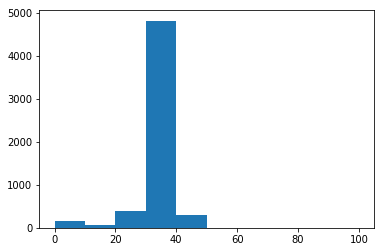

In [34]:
plt.hist(grain_df['PPG']);

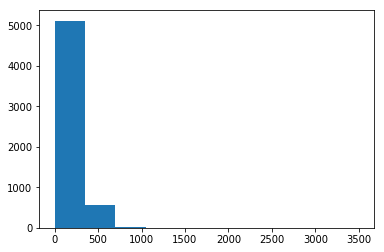

In [35]:
plt.hist(grain_df['color']);

In [36]:
grain_df.describe()

,PPG,color
count,5715.000000,5715.000000
mean,33.614523,85.132808
std,7.053595,171.564811
min,0.000000,0.000000
25%,33.000000,3.000000
50%,34.000000,10.000000
75%,37.000000,66.000000
max,100.000000,3500.000000


It looks like there are some values that don't make sense. Degrees lovibond should not be over 800, so all values above that should be dropped. PPG measures how much of an increase in specific gravity one would expect to see if one pound of the fermentable was added to 1 gallon of water. Therefore, PPG cannot be negative. Additionally, the PPG of dextrose is 46, which is the highest value of any fermentable that I know of. Anything beyond this value would not make sense. I'll find these values below and make sure the recipes with those specific grains get dropped.

In [37]:
grain_df[grain_df['color'] >= 800]

,PPG,color,generic,maltster,name
214,30,850,False,Any,Carafa II
1011,27,1400,False,Any,Black Malt
2130,35,2320,True,Dingemans,Biscuit (BE)
2152,28,1400,True,Any,Black Malt (UK)
2230,34,900,True,Dingemans,Chocolate (BE)
2269,1,3120,False,Any,Sinamar Extract
2336,0,1500,False,Any,Caramel Coloring
2671,33,1300,True,Briess,Roasted Barley (US)
3529,28,1500,True,Any,Black Malt (UK)
3957,27,1350,True,Any,Black Barley (US)


In [38]:
drop_list = list(grain_df[grain_df['color'] >= 800].index)

In [39]:
grain_df[grain_df['PPG'] < 0]

,PPG,color,generic,maltster,name


In [40]:
drop_list.append(5563)

In [41]:
drop_list += list(grain_df[grain_df['PPG'] > 46].index)

In [42]:
def grain_dropper(index):
    PPG, color, generic, maltster, name = grain_df.loc[index, :]
    for i in df.index:
        d = df.loc[i, 'fermentables']
        for j in d.values():
            if j['name'].lower() == name.lower() and j['PPG'] == PPG: 
                if j['generic'] == generic and j['maltster'].lower() == maltster.lower() and j['color'] == color:
                    df.drop(i, axis=0, inplace=True)
                    break
    return None

In [43]:
for i in drop_list:
    grain_dropper(i)

In [44]:
df.shape

(81254, 15)

Since I have dropped several recipes and I have found that all grains are using the same color units, I'll rerun the cells above that created the grain dataframe to get a more accurate picture of which grains remain

In [45]:
grain_list = []
for i in df.loc[:, 'fermentables'].values:
    for j in i.values():
        temp = j.copy()
        del temp['amount']
        del temp['amount_unit']
        del temp['use']
        del temp['color_unit']
        if temp not in grain_list:
            grain_list.append(temp)
grain_df = pd.DataFrame(grain_list)

In [46]:
grain_df.shape

(3936, 5)

In [47]:
len(grain_df['name'].unique())

834

Next I want to make sure that I remove all maltster names and the word malt from the name of grains in the grain data frame. To do so, I'll first make sure I change everything to lowercase.

In [48]:
# Make grain names and maltster names lowercase
grain_df['name'] = [g.lower() for g in grain_df['name']]
grain_df['maltster'] = [g.lower() for g in grain_df['maltster']]

In [49]:
def grain_name_cleaner(orig_names):
    # Make a copy of the original names to change to new names
    new_names = [x.lower() for x in orig_names]
    
    # Remove maltster names from grain names
    for i in grain_df['maltster'].unique():
        if i == 'any':
            continue
        new_names = [g.replace(i, '').strip() for g in new_names]

    # Remove the word malt and brewers from grain names
    new_names = [g.replace(' malt ', ' ').strip() for g in new_names]
    new_names = [g.replace("'", '').replace('brewers', '').strip() for g in new_names]
    
    # Replace unwanted characters/words in grain names
    # Build list of replacements
    grain_replacements = [
        # Punctuation
        ('-', ' '), ('/', ' '), (',', ''), ('(', ''), (')', ''), ('"', ''),

        # Symbols
        ('md™', ''), ('™', ''), ('®', ''), ('°', ''), 

        # Accented Characters
        ('á', 'a'), ('ö', 'o'), ('é', 'e'), ('ô', 'o'),

        # Maltster names
        ('thomas fawcett', ''), ('fawcett', ''), ('breiss', ''), ('best malz', ''), ('canada malting', ''),
        ('canadian malting', ''), ('château', ''), ('dingeman', ''), ('europ', ''), ('franco belges', ''),
        ('francobelges', ''), ('gladfield', ''), ('gleneagles', ''), ('malteurop', ''), ('maltexico', ''),
        ('pauls', ''), ('simpons', ''), ('tf', ''), ('warminster', ''), ('weyermann', ''), ('weyerman', ''),
        ('thomas faucett', ''), ('bairds', ''), ('valley', ''), ('caragill', ''), ('great western', ''),
        ('canada m.c.', ''), ('gambrinus', ''), ('muntons', ''), ('munton', ''),

        # Spelling mistakes
        ('torrefied', 'torrified'), ('floor ed', 'floor malted'), ('cara belge', 'carabelge'),
        ('cara pils', 'carapils'), ('cherrywood smoke', 'cherrywood smoked'), ('dextrine', 'dextrin'),
        ('de husked', 'dehusked'), ('de bittered', 'debittered'), ('marris otter', 'maris otter'),
        ('marrisottercarapils', 'maris otter carapils'), ('raisans', 'raisins'),
        ('bohemial', 'bohemian'), ('caraf i', 'carafa i'),

        # Terminology differences
        ('floored', 'floor malted'), ('cherry wood', 'cherrywood'), ('carafa special', 'carafa'),
        ('type 1', 'i'), ('type 3', 'iii'), ('oio g&p', 'ca'), ('oio ca', 'ca'), ('oio', ''),  
        ('rauchmalz', 'beechwood smoked malt de'), ('german rauch smoked', 'beechwood smoked malt de'),
        ('beechwood smoked malt', 'beechwood smoked malt de'), ('dehusked carafa iii special', 'dehusked carafa iii'),


        # Unnecessary descriptive words
        ('organic', ''), ('premium', ''), ('milk sugar', ''), ('ebc', ''), ('type two', ''), ('type', ''),
        ('trader joes', ''), ('brewers', ''), (' malt ', ' '), ('matl', ''),

        # Numbers to words
        ('2 ', 'two '), ('6 ', 'six '), 
    ]
    
    # Loop through list and run all replacements
    for r in grain_replacements:
        new_names = [g.replace(r[0], r[1]).strip() for g in new_names]
    
    # Remove 'malt' at beginning and end of grain names
    new_names = [g.replace('malt', '').strip() if g.startswith('malt ') else g for g in new_names]
    new_names = [g.replace('malt', '').strip() if g.endswith(' malt') else g for g in new_names]
    
    # Fix all multiple spaces to be a single space
    new_names = [re.sub('\s+', ' ', g) for g in new_names]
    
    # Replace country names
    new_names = [g.replace('american ', '').strip() + ' us' if 'american' in g else g for g in new_names]
    new_names = [g.replace('british ', '').strip() + ' uk' if 'british' in g else g for g in new_names]
    new_names = [g.replace('belgian ', '').strip() + ' be' if 'belgian' in g else g for g in new_names]
    new_names = [g.replace('canadian ', '').strip() + ' ca' if 'canadian' in g else g for g in new_names]
    new_names = [g.replace('english ', '').strip() + ' uk' if 'english' in g else g for g in new_names]
    new_names = [g.replace('german ', '').strip() + ' de' if 'german' in g else g for g in new_names]
    
    # Fix remaining issues from country names
    new_names = [g.replace('us ', '') + ' us' if 'us ' in g else g for g in new_names]
    new_names = [g.replace('uk ', '') + ' uk' if 'uk ' in g else g for g in new_names]
    new_names = [g.replace('de de', 'de') for g in new_names]
    new_names = [g[:-1].strip() if g.endswith(' l') else g for g in new_names]
    new_names = [g.replace('0l', '0').replace('4l', '4').replace('5l', '5').replace('7l', '7').replace('8l', '8') for g in new_names]
    
    # Fix different names for same grain
    full_replace = ['sucrose', 'acid']
    for i in full_replace:
        new_names = [i if i in g else g for g in new_names]
        
    # Create mapping dictionary
    grain_mapper = {orig_names[i]:new_names[i] for i in range(len(new_names))}
    
    return (new_names, grain_mapper)

In [50]:
grain_df['name'], grain_mapper = grain_name_cleaner(grain_df['name'])

In [51]:
grain_df[grain_df['PPG']==0]

,PPG,color,generic,maltster,name
30,0,0,False,any,rice hulls
153,0,0,False,any,maltodextrin
230,0,0,True,any,rice hulls
335,0,550,True,briess,midnight wheat us
419,0,17,False,weyermann®,abbey
641,0,0,False,briess,rice hulls
979,0,500,False,briess,blackprinz
1373,0,0,False,any,orange juice
1639,0,1,True,any,lactose
1740,0,20,False,any,caramel 20


In [53]:
mask_1 = grain_df['PPG'] == 0
mask_2 = grain_df['name'] != 'rice hulls'
mask_3 = grain_df['name'] != 'maltodextrin'
mask_4 = grain_df['name'] != 'lactose'

drop_indices = grain_df[(mask_1) & (mask_2) & (mask_3) & (mask_4)].index
for i in drop_indices:
    grain_dropper(i)

In [54]:
for i in df.index:
    d = df.loc[i, 'fermentables']
    for j in d.values():
        j['name'] = grain_mapper[j['name'].lower()]

In [55]:
df.shape

(81236, 15)

In [56]:
grain_df = grain_df.groupby('name').agg({
    'PPG': ['min', 'max', 'mean'],
    'color': ['min', 'max', 'mean'],
})

In [57]:
grain_df.columns

MultiIndex(levels=[['PPG', 'color'], ['min', 'max', 'mean']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [58]:
grain_df.columns = ['PPG_min', 'PPG_max', 'PPG_mean', 'color_min', 'color_max', 'color_mean']

## Cleaning Hops

In [59]:
# Create an empty list
hop_list = []

# Iterate through all rows
for i in df.loc[:, 'hops'].values:
    # Iterate through all entries in hop dictionary
    for j in i.values():
        temp = j.copy()
        # Remove unnecessary columns
        del temp['amount']
        del temp['time']
        # If the hop is not a duplicate, add it to the list
        if temp not in hop_list:
            hop_list.append(temp)

# Make a dataframe from the list of dictionaries
hops = pd.DataFrame(hop_list)

In [60]:
hops.head()

,alpha,amount_unit,form,generic,name,use
0,0.067,oz,Leaf,True,Fuggle (US),Boil
1,0.110,oz,Leaf,True,Citra (US),Boil
2,0.162,oz,Leaf,True,Zeus (US),Boil
3,0.098,oz,Leaf,True,Centennial (US),Boil
4,0.130,oz,Leaf,True,Chinook (US),Boil


In [61]:
hops.shape

(17082, 6)

In [62]:
# Find out what units are used to measure weight/amount of hops
hops['amount_unit'].value_counts()

oz    11955
g      5127
Name: amount_unit, dtype: int64

I'll have to write a function to convert gram measurements into ounces. This can be done later

In [63]:
hops.describe()

,alpha
count,17082.000000
mean,0.090587
std,0.045448
min,0.000000
25%,0.054000
50%,0.084000
75%,0.125000
max,1.600000


In [64]:
hops['use'].value_counts()

Boil          9734
Dry Hop       3664
First Wort    2047
Whirlpool     1266
Mash           371
Name: use, dtype: int64

In [65]:
hops['form'].value_counts()

Pellet    11914
Leaf       4851
Plug        317
Name: form, dtype: int64

In [66]:
hops[hops['alpha']==0]

,alpha,amount_unit,form,generic,name,use
3439,0.0,oz,Pellet,True,Amarillo (US),Boil
4340,0.0,g,Pellet,True,Cascade (US),Dry Hop
4341,0.0,g,Pellet,True,Citra (US),Dry Hop
4781,0.0,g,Pellet,True,Amarillo (US),Dry Hop
4782,0.0,g,Leaf,True,Simcoe (US),Dry Hop
5498,0.0,g,Pellet,True,Tettnanger (DE),Boil
6707,0.0,oz,Pellet,False,Mosaic,Dry Hop
7250,0.0,oz,Leaf,True,Cascade (US),Boil
7444,0.0,oz,Pellet,False,Hop Shot,Boil
8345,0.0,oz,Pellet,True,Ahtanum (US),Dry Hop


Hops should not have 0 alpha acid, so recipes with these hops should be removed as the information is not valid

In [67]:
hops[hops['name'] == 'heirloom/homegrown']

,alpha,amount_unit,form,generic,name,use
594,0.045,oz,Pellet,True,heirloom/homegrown,Boil
1474,0.045,oz,Leaf,True,heirloom/homegrown,Boil
1557,0.045,oz,Pellet,True,heirloom/homegrown,Dry Hop
6210,0.045,oz,Leaf,True,heirloom/homegrown,Dry Hop
9642,0.045,oz,Pellet,True,heirloom/homegrown,Mash
10634,0.045,oz,Pellet,True,heirloom/homegrown,First Wort
12319,0.045,g,Pellet,True,heirloom/homegrown,Boil
12320,0.045,g,Pellet,True,heirloom/homegrown,Dry Hop
13363,0.146,oz,Pellet,True,heirloom/homegrown,First Wort
13364,0.146,oz,Pellet,True,heirloom/homegrown,Boil


Recipes with homegrown hops will not be considered for reasons mentioned above about trustworthiness of measurements

In [81]:
hops.columns

Index(['alpha', 'amount_unit', 'form', 'generic', 'name', 'use'], dtype='object')

In [89]:
def hop_dropper(indices):
    names = [hops.loc[x, 'name'] for x in indices]
    alphas = [hops.loc[x, 'alpha'] for x in indices]
    forms = [hops.loc[x, 'form'] for x in indices]
    for i in df.index:
        d = df.loc[i, 'hops'].values()
        for j in d:
            if j['name'] in names:
                if j['alpha'] == alphas[names.index(j['name'])] and j['form'] == forms[names.index(j['name'])]:
                    df.drop(i, axis=0, inplace=True)
                    break
    return None

In [90]:
drop_indices = list(hops[hops['alpha']==0].index) + list(hops[hops['name'] == 'heirloom/homegrown'].index)
hop_dropper(drop_indices)

In [91]:
df.shape

(81198, 15)

In [ ]:
# Create an empty list
hop_list = []

# Iterate through all rows
for i in df.loc[:, 'hops'].values:
    # Iterate through all entries in hop dictionary
    for j in i.values():
        temp = j.copy()
        # Remove unnecessary columns
        del temp['amount']
        del temp['time']
        # If the hop is not a duplicate, add it to the list
        if temp not in hop_list:
            hop_list.append(temp)

# Make a dataframe from the list of dictionaries
hops = pd.DataFrame(hop_list)

In [ ]:
hops['name'] = [h.lower() for h in hops.name]

## Cleaning Yeast

In [92]:
# Create an empty list
yeast_list = []

# Iterate through all rows
for i in df.loc[:, 'yeast'].values:
    # Iterate through all entries in yeast dictionary
    for j in i.values():
        # If the yeast is not a duplicate, add it to the list
        if j not in yeast_list:
            yeast_list.append(j)

# Make a dataframe from the list of dictionaries
yeasts = pd.DataFrame(yeast_list)
yeasts.head()

,name,yeast_attenuation,yeast_lab
0,1.5\n\noz,0.80,Wyeast
1,Dry English Ale Yeast,0.75,White Labs WLP007
2,Denny's Favorite 50,0.77,Wyeast 1450
3,Northwest Ale,0.69,Wyeast 1332
4,Safale S-04,0.73,Fermentis S-04


In [93]:
yeasts.shape

(3574, 3)

In [96]:
yeasts[yeasts['yeast_attenuation'] ==0]

,name,yeast_attenuation,yeast_lab
738,Pediococcus,0.0,Wyeast 5733
3407,0.5\n\noz,0.0,Wyeast


In [98]:
yeasts[yeasts['name'] == 'Pediococcus']

,name,yeast_attenuation,yeast_lab
738,Pediococcus,0.00,Wyeast 5733
843,Pediococcus,0.80,Wyeast 5733
2642,Pediococcus,0.75,Wyeast 5733
2697,Pediococcus,0.98,Wyeast 5733
2841,Pediococcus,0.69,Wyeast 5733
3079,Pediococcus,0.95,Wyeast 5733
3511,Pediococcus,0.78,Wyeast 5733


In [99]:
num_yeast = []
for i in df.index:
    d = df.loc[i, 'yeast']
    num_yeast.append(len(d))
    for j in d.values():
        if j['name'] == 'Pediococcus' or j['name'] == '0.5\n\noz':
            if j['yeast_attenuation'] == 0:
                df.drop(i, axis=0, inplace=True)
                break

In [102]:
num_yeast.count(1)

77339

In [104]:
num_yeast.count(2)

3414

In [105]:
df.shape[0] - 77339 - 3414

438

In [107]:
num_yeast.count(4)

90

---
## Converting Weights of Fermentables and Hops

First, I need to write a function to convert each of the different units for weight that exist in the data set to a singular unit. For fermentables, I'll use pounds, and for hops I'll use ounces.

In [ ]:
def convert_to_pounds(amount, unit):
    if unit == 'lb':
        return amount
    if unit == 'oz':
        return round(amount/16, 3)
    if unit == 'g':
        return round(amount * 0.00220462, 3)
    if unit == 'kg':
        return round(amount * 2.20462, 3)
    
def convert_to_oz(amount, unit):
    if unit == 'oz':
        return amount
    if unit == 'lb':
        return amount*16
    if unit == 'g':
        return round(amount*0.035274, 3)

In [ ]:
styles = pd.read_csv('../Data/styleData.csv')
recipes = pd.read_csv('../Data/recipeData.csv')

In [ ]:
styles.head()

In [ ]:
styles.info()

In [ ]:
styles.isnull().sum()

In [ ]:
styles['Style'].sort_values()

In [ ]:
styles.loc[108:112, :]

In [ ]:
recipes.info()

In [ ]:
recipes.isnull().sum()

In [ ]:
beer_advocate = pd.read_csv('../Data/beer_reviews.csv')

In [ ]:
beer_advocate.head()

In [ ]:
beer_advocate.info()

In [ ]:
beer_advocate.isnull().sum()

In [ ]:
67785/beer_advocate.shape[0]

In [ ]:
len(beer_advocate[beer_advocate['beer_abv'].isnull()]['beer_beerid'].unique())

In [ ]:
overlap_names = set(beer_advocate[beer_advocate['beer_abv'].isnull()]['beer_name'].unique()).intersection(set(beer_advocate[beer_advocate['beer_abv'].notnull()]['beer_name'].unique()))

In [ ]:
overlap_names

In [ ]:
beer_advocate[beer_advocate['beer_name'] == 'Apricot Ale']

In [ ]:
len(beer_advocate['review_profilename'].unique())

In [ ]:
for col in beer_advocate.columns:
    print(col, len(beer_advocate[col].unique()))

In [ ]:
beer_advocate['beer_abv'].describe()

In [ ]:
beer_advocate.sort_values('beer_abv', ascending=False).head()

In [ ]:
beer_advocate[beer_advocate['beer_abv'] > 15].shape

In [ ]:
beer_advocate.groupby('beer_beerid').count()['review_overall'][beer_advocate.groupby('beer_beerid').count()['review_overall'] > 10].shape

In [ ]:
beer_advocate.groupby('beer_name').count()['review_overall'][beer_advocate.groupby('beer_name').count()['review_overall'] > 10].shape

In [ ]:
duplicate_names = []
for name in beer_advocate['beer_name'].unique():
    if len(beer_advocate[beer_advocate['beer_name'] == name]['beer_beerid'].unique()) > 1:
        duplicate

In [ ]:
import requests

In [ ]:
url = 'https://www.brewtoad.com/recipes?page=1&sort=rank'

res = requests.get(url)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(res.content, 'lxml')

In [ ]:
base_url = 'http://www.brewtoad.com'

In [ ]:
recipe_links = soup.find_all('a', attrs={'class': 'recipe-link'})

In [ ]:
recipes = []
for i in recipe_links:
    # Get new URL
    new_url = base_url + i.attrs['href']
    
    # Use new URL to generate new request
    new_res = requests.get(new_url)
    
    # Create new beautiful soup parser
    new_soup = BeautifulSoup(new_res.content, 'lxml')
    
    #instantiate recipe dictionary
    recipe = {}
    
    # Find Name and Style
    recipe['name'] = new_soup.find('h1').text.strip()
    recipe['style'] = new_soup.find('div', attrs={'class': 'header-content'}).find('a').text.strip()
    
    # Find base stats and append to dictionary
    base_stats = new_soup.find_all('div', attrs={'class': 'value'})
    recipe['OG'] = base_stats[0].text
    recipe['FG'] = base_stats[1].text
    recipe['IBU'] = base_stats[2].text
    recipe['SRM'] = base_stats[3].text
    recipe['ABV'] = base_stats[4].text
    
    # Find fermentables and append to dictionary
    grains = new_soup.find('table', attrs={'id': 'fermentables'}).find('tbody').find_all('tr')
    fermentables = []
    for g in grains:
        row = g.find_all('td')
        fermentable = {}
        fermentable['amount'] = row[0].text.strip()
        fermentable['name'] = row[1].text.strip()
        fermentable['maltster'] = row[2].text.strip()
        fermentable['use'] = row[3].text.strip()
        fermentable['PPG'] = row[4].text.strip()
        fermentable['color'] = row[5].text.replace('\n', '')
        fermentables.append(fermentable)
    recipe['fermentables'] = fermentables
    
    # Find hops and append to dictionary
    hop_table = new_soup.find('table', attrs={'id': 'hops'}).find('tbody').find_all('tr')
    hops = []
    for h in hop_table:
        row = h.find_all('td')
        hop = {}
        hop['amount'] = row[0].text.replace('\n', '')
        hop['name'] = row[1].text.replace('\n', '')
        hop['time'] = row[2].text.replace('\n', '')
        hop['use'] = row[3].text.replace('\n', '')
        hop['form'] = row[4].text.replace('\n', '')
        hop['alpha'] = row[5].text.replace('\n', '')
        hops.append(hop)
    recipe['hops'] = hops
    
    # Find yeast
    

In [ ]:
for i in df.index:
    g = 

In [ ]:
df.head()

In [ ]:
df.loc[0, 'yeast']

In [ ]:
df.loc[0, 'extras']

In [ ]:
all_generic_count = 0
full_generic = []

for i in df.index:
    g = df.loc[i, 'fermentables'].values()
    ind_count = 0
    for j in g:
        if j['generic']:
            ind_count += 1
    if ind_count != len(g):
        full_generic.append(0)
        continue
    h = df.loc[i, 'hops'].values()
    ind_count = 0
    for j in h:
        if j['generic']:
            ind_count += 1
    if ind_count != len(h):
        full_generic.append(0)
        continue
    e = df.loc[i, 'extras']
    if type(e) == dict:
        ind_count=0
        for j in e.values():
            if j['generic']:
                ind_count += 1
        if ind_count!= len(e):
            full_generic.append(0)
            continue
    all_generic_count += 1
    full_generic.append(1)
            
        
all_generic_count

In [ ]:
df['full_generic'] = full_generic

In [ ]:
df[df['full_generic']==1]

In [ ]:
df[df['full_generic']==1]['style'].value_counts()

In [ ]:
df['style'].value_counts()

In [ ]:
df[df['full_generic']==1]['meets_guidelines'].mean()

In [ ]:
asdf = {1:1, 2:2}
type(asdf)

In [ ]:
type(asdf) == 'dict'

In [ ]:
type(asdf) == dict